In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
from typing import List

# Load data

In [2]:
logins = pd.read_csv("LOGINS.csv")
demographics = pd.read_csv("SOCIODEMOGRAFICA.csv")
trx = pd.read_csv("TRANSACCIONES.csv")
users = pd.read_csv("USERS.csv")

# First look

## logins

In [3]:
print(logins.shape)
logins.head()

(78327, 4)


,id,id_session,fecha_evento,tag
0,1357,adfc313e-7c4e-4315-b996-1fe3d3f0c49a,2023-02-09,trx_login_id_success
1,1205,e33bb826-667c-4f7b-a762-56379050ebe0,2023-02-10,trx_login_pin_success
2,1871,0ae6fd5c-7786-4193-ad6e-a51a10d24725,2023-02-07,trx_login_id_success
3,2435,348cf1a1-9738-495f-93ff-26942d695844,2023-02-09,trx_login_id_success
4,879,90c401b7-f02f-449d-85ed-e0d7f449ffef,2023-02-10,trx_login_pin_success


In [4]:
logins.dtypes

id               int64
id_session      object
fecha_evento    object
tag             object
dtype: object

## demographics

In [5]:
print(demographics.shape)
demographics.head()

(2587, 12)


,id,TipoVivienda,SituacionLaboral,EstadoCivil,NivelEstudios,Edad,RangoEdad,Genero,NumeroCargasFamiliares,SectorEconomico,ActividadEconomica,IngresoSueldos
0,1,VIVE CON FAMILIARES,INDEPENDIENTE,VIUDO,MEDIOS / SECUNDARIOS,73,9.- Más de 65,FEMENINO,0,SIN ACTIVIDAD ECONOMICA CIIU ...,SIN ACTIVIDAD ECONOMICA CIIU,0.0
1,23,PROPIA NO HIPOTECADA,EMPLEADO,CASADO,PRIMARIOS/BASICOS,41,6.- 35-45,FEMENINO,3,"TEXTILES, PRENDAS DE VESTIR E INDUSTRIAS DEL C...",OTROS PRODUCTOS TEXTILES,560.0
2,72,VIVE CON FAMILIARES,EMPLEADO,CASADO,UNIVERSITARIOS,38,6.- 35-45,FEMENINO,0,ADMINISTRACION PUBLICA Y DEFENSA ...,DESEMPENO DE LAS FUNCIONES EJECUTIVAS Y LEGISL...,976.0
3,90,VIVE CON FAMILIARES,NO TRABAJA,UNION LIBRE < 2 ANIOS,MEDIOS / SECUNDARIOS,30,5.- 27-35,MASCULINO,0,SIN ACTIVIDAD ECONOMICA CIIU ...,AMA DE CASA,0.0
4,105,NO DEFINIDO,EMPLEADO,SOLTERO,NO DEFINIDO,24,3.- 21-25,MASCULINO,0,"COMERCIO AL POR MAYOR, EXCEPTO EL DE VEHICULOS...",VENTA AL POR MAYOR DE DESPERDICIOS Y DESECHOS ...,400.0


In [6]:
demographics.dtypes

id                          int64
TipoVivienda               object
SituacionLaboral           object
EstadoCivil                object
NivelEstudios              object
Edad                        int64
RangoEdad                  object
Genero                     object
NumeroCargasFamiliares      int64
SectorEconomico            object
ActividadEconomica         object
IngresoSueldos            float64
dtype: object

## trx

In [7]:
print(trx.shape)
trx.head()

(21509, 5)


,id,id_transaccion_unico,monto_transaccion,detalle_tipo_transaccion,fecha_transaccion
0,1516,8ac85193-0e70-41cd-9a8e-b3da45c0ff50,0.45,OTROS,2023-12-07
1,1786,ad251ad9-31b4-4d8f-a1b0-2cf962e53831,0.45,OTROS,2023-12-16
2,1972,36e1cada-5070-4a21-976b-0fa342239a24,0.45,OTROS,2024-01-09
3,1693,753f3910-7d46-4868-acd5-3c452bd584ae,0.45,OTROS,2024-01-06
4,2278,bfd65a8a-7d1d-4a9c-877b-d4d333f635f2,0.45,OTROS,2024-01-07


In [8]:
trx.dtypes

id                            int64
id_transaccion_unico         object
monto_transaccion           float64
detalle_tipo_transaccion     object
fecha_transaccion            object
dtype: object

## users

In [9]:
print(users.shape)
users.head()

(2587, 4)


,id,fecha_afiliacion,fecha_primera_transaccion_pago,fecha_ultima_transaccion_pago
0,1,2023-07-03,2023-07-03,2023-07-03
1,23,2023-07-28,2023-07-28,2023-07-28
2,72,2023-07-10,2023-07-10,2024-01-12
3,90,2023-06-15,NaN,NaN
4,105,2023-04-24,2023-04-24,2023-04-24


In [10]:
users.dtypes

id                                 int64
fecha_afiliacion                  object
fecha_primera_transaccion_pago    object
fecha_ultima_transaccion_pago     object
dtype: object

# EDA

In [11]:
def _numerical_eda(df: pd.DataFrame,
                   features: List[str]
                  ) -> pd.DataFrame:
    """
    Exploratory data analysis of numerical features
    """
    df = df[features]

    len_list = []
    null_list = []
    prop_null_list = []
    mean_list = []
    std_list = []
    min_list = []
    per_1_list = []
    per_25_list = []
    median_list = []
    per_75_list = []
    per_99_list = []
    max_list = []

    for i in features:
        len_v = len(df)
        len_list.append(len_v)
        null_v = df[i].isnull().sum()
        null_list.append(null_v)
        prop_null_v = null_v/len_v
        prop_null_list.append(prop_null_v)
        mean_v = np.mean(df[i])
        mean_list.append(mean_v)
        std_v = np.std(df[i])
        std_list.append(std_v)
        min_v = np.min(df[i])
        min_list.append(min_v)
        per_1_v = np.percentile(df[i].dropna(), 1)
        per_1_list.append(per_1_v)
        per_25_v = np.percentile(df[i].dropna(), 25)
        per_25_list.append(per_25_v)
        median_v = np.median(df[i].dropna())
        median_list.append(median_v)
        per_75_v = np.percentile(df[i].dropna(), 75)
        per_75_list.append(per_75_v)
        per_99_v = np.percentile(df[i].dropna(), 99)
        per_99_list.append(per_99_v)
        max_v = np.max(df[i])
        max_list.append(max_v)

    df = pd.DataFrame({"feature": features,
                       "n_row": len_list,
                       "n_col": len(features),
                       "num_null": null_list,
                       "prop_null": prop_null_list,
                       "mean": mean_list,
                       "std": std_list,
                       "min": min_list,
                       "per_1": per_1_list,
                       "per_25": per_25_list,
                       "median": median_list,
                       "per_75": per_75_list,
                       "per_99": per_99_list,
                       "max": max_list
                      })    
    df  = df.sort_values(by=["feature"])
    df = df.reset_index(drop=True)
    return df


def _categorical_eda(df: pd.DataFrame,
                     features: List[str]
                    ) -> pd.DataFrame:
    """
    Exploratory data analysis of categorical features
    """
    df = df[features]

    len_list = []
    null_list = []
    prop_null_list = []
    category_list = []
    num_category_list = []
    mode_list = []
    mode_count_list = []

    for i in features:
        len_v = len(df)
        len_list.append(len_v)
        null_v = df[i].isnull().sum()
        null_list.append(null_v)
        prop_null_v = null_v/len_v
        prop_null_list.append(prop_null_v)
        category_v = df[i].unique()
        category_list.append(category_v)
        num_category_v = len(category_v)
        num_category_list.append(num_category_v)
        mode_v = df[i].mode()[0]
        mode_list.append(mode_v)
        mode_count_v = len(df[i][df[i] == mode_v])
        mode_count_list.append(mode_count_v)

    df = pd.DataFrame({"feature": features,
                       "n_row": len_list,
                       "n_col": len(features),
                       "num_null": null_list,
                       "prop_null": prop_null_list,
                       "num_categories": num_category_list,
                       "category": category_list,
                       "mode": mode_list,
                       "mode_count": mode_count_list,
                      })
    df  = df.sort_values(by=["feature"])
    df = df.reset_index(drop=True)
    return df

def _add_prefix_in_columns(df, prefix, exclude):
    column_names = []
    for col in df.columns:
        if col in exclude:
            column_names.append(col)
        else:
            column_names.append(prefix + str(col))
    return column_names

## logins

In [12]:
df = logins

numerical_features = list([col for col in df.select_dtypes(['float64', 'int64']).columns])
categorical_features = list([col for col in df.select_dtypes('object').columns])

_numerical_eda(df, numerical_features)

,feature,n_row,n_col,num_null,prop_null,mean,std,min,per_1,per_25,median,per_75,per_99,max
0,id,78327,1,0,0.0,1312.010367,744.583716,1,38.0,709.0,1276.0,1990.0,2568.0,2587


In [13]:
_categorical_eda(df, categorical_features)

,feature,n_row,n_col,num_null,prop_null,num_categories,category,mode,mode_count
0,fecha_evento,78327,3,0,0.00000,363,"[2023-02-09, 2023-02-10, 2023-02-07, 2023-02-1...",2023-10-10,482
1,id_session,78327,3,18,0.00023,74721,"[adfc313e-7c4e-4315-b996-1fe3d3f0c49a, e33bb82...",ea86153c-39f5-47a1-9f02-03528be8c3e1,4
2,tag,78327,3,0,0.00000,12,"[trx_login_id_success, trx_login_pin_success, ...",trx_login_id_success,43753


In [14]:
df["tag"].value_counts()

tag
trx_login_id_success                            43753
trx_login_pin_success                           30847
trx_onboarding_primerlogin_exito                 3249
trx_process_deeplink_after_login                  231
trx_login_id_error                                190
trx_login_pin_error                                26
trx_enr_credential_login                            9
trx_login_user_error                                9
trx_login_general_error                             7
trx_login_user_success                              4
trx_login_id                                        1
trx_service_error_SEC-LOG-PIN-login_required        1
Name: count, dtype: int64

In [15]:
print(df['fecha_evento'].min())
print(df['fecha_evento'].max())

2023-01-10
2024-01-24


## demographics

In [21]:
df = demographics

numerical_features = list([col for col in df.select_dtypes(['float64', 'int64']).columns])
categorical_features = list([col for col in df.select_dtypes('object').columns])

_numerical_eda(df, numerical_features)

,feature,n_row,n_col,num_null,prop_null,mean,std,min,per_1,per_25,median,per_75,per_99,max
0,Edad,2587,4,0,0.00000,31.945883,11.859349,16.0,18.00,23.0,29.0,38.0,68.00,99.0
1,IngresoSueldos,2587,4,32,0.01237,272.907202,477.397707,0.0,0.00,0.0,0.0,450.0,2487.04,5009.0
2,NumeroCargasFamiliares,2587,4,0,0.00000,0.365288,0.844227,0.0,0.00,0.0,0.0,0.0,4.00,10.0
3,id,2587,4,0,0.00000,1294.000000,746.802517,1.0,26.86,647.5,1294.0,1940.5,2561.14,2587.0


In [22]:
_categorical_eda(df, categorical_features)

,feature,n_row,n_col,num_null,prop_null,num_categories,category,mode,mode_count
0,ActividadEconomica,2587,8,12,0.004639,276,"[SIN ACTIVIDAD ECONOMICA CIIU, OTROS PRODUCTO...",SIN ACTIVIDAD ECONOMICA CIIU,1448
1,EstadoCivil,2587,8,8,0.003092,7,"[VIUDO, CASADO, UNION LIBRE < 2 ANIOS, SOLTERO...",SOLTERO,1884
2,Genero,2587,8,0,0.000000,3,"[FEMENINO, MASCULINO, ND]",MASCULINO,1301
3,NivelEstudios,2587,8,12,0.004639,8,"[MEDIOS / SECUNDARIOS , PRI...",MEDIOS / SECUNDARIOS,1699
4,RangoEdad,2587,8,0,0.000000,9,"[9.- Más de 65, 6.- 35-45, 5.- 27-35, 3.- 21-2...",5.- 27-35,655
5,SectorEconomico,2587,8,12,0.004639,45,[SIN ACTIVIDAD ECONOMICA CIIU ...,SIN ACTIVIDAD ECONOMICA CIIU ...,1669
6,SituacionLaboral,2587,8,12,0.004639,6,"[INDEPENDIENTE , EMP...",EMPLEADO,920
7,TipoVivienda,2587,8,0,0.000000,7,"[VIVE CON FAMILIARES , PRO...",VIVE CON FAMILIARES,1735


In [23]:
pd.set_option('display.max_rows', 10000)
demographics['ActividadEconomica'].value_counts()

ActividadEconomica
SIN ACTIVIDAD ECONOMICA  CIIU                                                                   1448
ESTUDIANTE                                                                                       159
OTROS SERVICIOS PRESTADOS                                                                         91
AMA DE CASA                                                                                       61
OTROS SERVICIOS PERSONALES                                                                        58
SECTOR PUBLICO                                                                                    49
SERVICIOS DE GUARDIAS DE SEGURIDAD                                                                30
ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES DE PERSONAL DOMESTICO COMO SIRVIENTES COCINEROS       19
RESTAURANTES, CEVICHERIAS, PICANTERIAS, CAFETERIAS, ETCETERA, INCLUIDO COMIDA PARA LLEVAR         17
DESEMPENO DE LAS FUNCIONES EJECUTIVAS Y LEGISLATIVAS DE LOS ORGANOS Y OR

In [24]:
demographics['SectorEconomico'].value_counts()

SectorEconomico
SIN ACTIVIDAD ECONOMICA CIIU                                                                            1669
SERVICIOS PRESTADOS A EMPRESAS                                                                           172
COMERCIO                                                                                                 103
ADMINISTRACION PUBLICA Y DEFENSA                                                                          84
PRODUCCION AGROPECUARIA                                                                                   78
SERVICIOS PERSONALES Y DE LOS HOGARES                                                                     68
INSTRUCCION PUBLICA                                                                                       43
ACTIVIDADES NO ECONOMICAS                                                                                 41
SERVICIOS MEDICOS QUIRURGICOS Y OTROS SERVICIOS DE SANIDAD                                                40
RES

## trx

In [27]:
df = trx

numerical_features = list([col for col in df.select_dtypes(['float64', 'int64']).columns])
categorical_features = list([col for col in df.select_dtypes('object').columns])

_numerical_eda(df, numerical_features)

,feature,n_row,n_col,num_null,prop_null,mean,std,min,per_1,per_25,median,per_75,per_99,max
0,id,21509,2,0,0.0,1447.028639,738.976487,1.00,31.0,920.0,1656.00,2055.00,2543.0,2585.0
1,monto_transaccion,21509,2,0,0.0,17.912266,34.385616,0.01,0.1,3.0,6.15,18.75,200.0,500.0


In [28]:
_categorical_eda(df, categorical_features)

,feature,n_row,n_col,num_null,prop_null,num_categories,category,mode,mode_count
0,detalle_tipo_transaccion,21509,3,0,0.0,5,"[OTROS, P2P, P2B, CASHIN, sin_definir_interna]",P2P,9265
1,fecha_transaccion,21509,3,0,0.0,362,"[2023-12-07, 2023-12-16, 2024-01-09, 2024-01-0...",2023-10-12,148
2,id_transaccion_unico,21509,3,0,0.0,21509,"[8ac85193-0e70-41cd-9a8e-b3da45c0ff50, ad251ad...",00002a0e-9d20-4d00-a691-7efa685f0e1c,1


In [29]:
df["detalle_tipo_transaccion"].value_counts()

detalle_tipo_transaccion
P2P                    9265
P2B                    8683
OTROS                  2577
CASHIN                  961
sin_definir_interna      23
Name: count, dtype: int64

In [30]:
print(df['fecha_transaccion'].min())
print(df['fecha_transaccion'].max())

2023-01-28
2024-01-24


## users

In [35]:
df = users

numerical_features = list([col for col in df.select_dtypes(['float64', 'int64']).columns])
categorical_features = list([col for col in df.select_dtypes('object').columns])

_numerical_eda(df, numerical_features)

,feature,n_row,n_col,num_null,prop_null,mean,std,min,per_1,per_25,median,per_75,per_99,max
0,id,2587,1,0,0.0,1294.0,746.802517,1,26.86,647.5,1294.0,1940.5,2561.14,2587


In [36]:
_categorical_eda(df, categorical_features)

,feature,n_row,n_col,num_null,prop_null,num_categories,category,mode,mode_count
0,fecha_afiliacion,2587,3,0,0.000000,269,"[2023-07-03, 2023-07-28, 2023-07-10, 2023-06-1...",2023-03-29,28
1,fecha_primera_transaccion_pago,2587,3,811,0.313491,330,"[2023-07-03, 2023-07-28, 2023-07-10, nan, 2023...",2023-04-13,21
2,fecha_ultima_transaccion_pago,2587,3,811,0.313491,342,"[2023-07-03, 2023-07-28, 2024-01-12, nan, 2023...",2024-01-24,73


# Feature engineering

## trx

In [37]:
trx_df = (trx
           .groupby(['id'])
           .agg({'monto_transaccion': ['sum','mean'],
                 'id_transaccion_unico': lambda x: x.nunique(),
                 'fecha_transaccion': 'max',
                 })
           .reset_index()
           )

trx_df.columns = ['id', 'monto_sum', 'monto_mean', 'trx_count', 'trx_date_max']

trx_df.columns = _add_prefix_in_columns(trx_df, "TRX_", exclude=['id'])

trx_pivot = (trx
             .pivot_table(values='id_transaccion_unico',
                          index='id', 
                          columns='detalle_tipo_transaccion',
                          aggfunc=lambda x: len(x.unique())
                         )
             .reset_index()
            )

trx_pivot.columns = _add_prefix_in_columns(trx_pivot, "TRX_", exclude=['id'])

In [38]:
print(trx_df.shape)
trx_df.head()

(1774, 5)


,id,TRX_monto_sum,TRX_monto_mean,TRX_trx_count,TRX_trx_date_max
0,1,3.00,3.000000,1,2023-07-03
1,2,3.00,3.000000,1,2023-08-29
2,3,13.00,4.333333,3,2023-10-29
3,4,0.01,0.010000,1,2023-07-10
4,5,10.00,10.000000,1,2023-10-12


In [39]:
print(trx_pivot.shape)
trx_pivot.head()

(1774, 6)


,id,TRX_CASHIN,TRX_OTROS,TRX_P2B,TRX_P2P,TRX_sin_definir_interna
0,1,NaN,NaN,NaN,1.0,NaN
1,2,NaN,NaN,NaN,1.0,NaN
2,3,NaN,NaN,NaN,3.0,NaN
3,4,NaN,NaN,NaN,1.0,NaN
4,5,1.0,NaN,NaN,NaN,NaN


## logins

In [40]:
logins_df = (logins
             .groupby(['id'])
             .agg({'id_session': lambda x: x.nunique(),
                   'fecha_evento': 'max',
                  })
             .reset_index()
            )

logins_df.columns = ['id', 'login_count', 'login_date_max']

logins_df.columns = _add_prefix_in_columns(logins_df, "LOGINS_", exclude=['id'])

logins_pivot = (logins
                .pivot_table(values='id_session',
                             index='id', 
                             columns='tag',
                             aggfunc=lambda x: len(x.unique())
                            )
                .reset_index()
               )

logins_pivot = logins_pivot[['id', 'trx_login_id_success', 'trx_login_pin_success']]

logins_pivot.columns = _add_prefix_in_columns(logins_pivot, "LOGINS_", exclude=['id'])

In [41]:
print(logins_df.shape)
logins_df.head()

(2550, 3)


,id,LOGINS_login_count,LOGINS_login_date_max
0,1,1,2023-07-03
1,2,4,2023-09-04
2,3,4,2023-10-29
3,4,5,2023-08-04
4,6,2,2023-07-08


In [42]:
print(logins_pivot.shape)
logins_pivot.head()

(2550, 3)


,id,LOGINS_trx_login_id_success,LOGINS_trx_login_pin_success
0,1,NaN,1.0
1,2,1.0,3.0
2,3,NaN,4.0
3,4,NaN,5.0
4,6,NaN,2.0


## demographics

In [43]:
demographics_df = demographics.drop(['ActividadEconomica', 'SectorEconomico'], axis=1)
demographics_df.columns = _add_prefix_in_columns(demographics_df, "DEMO_", exclude=['id'])

In [44]:
print(demographics_df.shape)
demographics_df.head()

(2587, 10)


,id,DEMO_TipoVivienda,DEMO_SituacionLaboral,DEMO_EstadoCivil,DEMO_NivelEstudios,DEMO_Edad,DEMO_RangoEdad,DEMO_Genero,DEMO_NumeroCargasFamiliares,DEMO_IngresoSueldos
0,1,VIVE CON FAMILIARES,INDEPENDIENTE,VIUDO,MEDIOS / SECUNDARIOS,73,9.- Más de 65,FEMENINO,0,0.0
1,23,PROPIA NO HIPOTECADA,EMPLEADO,CASADO,PRIMARIOS/BASICOS,41,6.- 35-45,FEMENINO,3,560.0
2,72,VIVE CON FAMILIARES,EMPLEADO,CASADO,UNIVERSITARIOS,38,6.- 35-45,FEMENINO,0,976.0
3,90,VIVE CON FAMILIARES,NO TRABAJA,UNION LIBRE < 2 ANIOS,MEDIOS / SECUNDARIOS,30,5.- 27-35,MASCULINO,0,0.0
4,105,NO DEFINIDO,EMPLEADO,SOLTERO,NO DEFINIDO,24,3.- 21-25,MASCULINO,0,400.0


## users

In [45]:
users.columns = _add_prefix_in_columns(users, "USERS_", exclude=['id'])

In [46]:
print(users.shape)
users.head()

(2587, 4)


,id,USERS_fecha_afiliacion,USERS_fecha_primera_transaccion_pago,USERS_fecha_ultima_transaccion_pago
0,1,2023-07-03,2023-07-03,2023-07-03
1,23,2023-07-28,2023-07-28,2023-07-28
2,72,2023-07-10,2023-07-10,2024-01-12
3,90,2023-06-15,NaN,NaN
4,105,2023-04-24,2023-04-24,2023-04-24


## JOIN

In [47]:
data = pd.merge(users, demographics_df, on='id', how='left')
data = pd.merge(data, logins_df, on='id', how='left')
data = pd.merge(data, logins_pivot, on='id', how='left')
data = pd.merge(data, trx_df, on='id', how='left')
data = pd.merge(data, trx_pivot, on='id', how='left')

In [48]:
pd.set_option('display.max_columns', 5000)
print(data.shape)
data.head()

(2587, 26)


,id,USERS_fecha_afiliacion,USERS_fecha_primera_transaccion_pago,USERS_fecha_ultima_transaccion_pago,DEMO_TipoVivienda,DEMO_SituacionLaboral,DEMO_EstadoCivil,DEMO_NivelEstudios,DEMO_Edad,DEMO_RangoEdad,DEMO_Genero,DEMO_NumeroCargasFamiliares,DEMO_IngresoSueldos,LOGINS_login_count,LOGINS_login_date_max,LOGINS_trx_login_id_success,LOGINS_trx_login_pin_success,TRX_monto_sum,TRX_monto_mean,TRX_trx_count,TRX_trx_date_max,TRX_CASHIN,TRX_OTROS,TRX_P2B,TRX_P2P,TRX_sin_definir_interna
0,1,2023-07-03,2023-07-03,2023-07-03,VIVE CON FAMILIARES,INDEPENDIENTE,VIUDO,MEDIOS / SECUNDARIOS,73,9.- Más de 65,FEMENINO,0,0.0,1.0,2023-07-03,NaN,1.0,3.00,3.000000,1.0,2023-07-03,NaN,NaN,NaN,1.0,NaN
1,23,2023-07-28,2023-07-28,2023-07-28,PROPIA NO HIPOTECADA,EMPLEADO,CASADO,PRIMARIOS/BASICOS,41,6.- 35-45,FEMENINO,3,560.0,7.0,2023-10-12,6.0,1.0,3.00,3.000000,1.0,2023-07-28,NaN,NaN,NaN,1.0,NaN
2,72,2023-07-10,2023-07-10,2024-01-12,VIVE CON FAMILIARES,EMPLEADO,CASADO,UNIVERSITARIOS,38,6.- 35-45,FEMENINO,0,976.0,7.0,2024-01-12,5.0,2.0,82.75,13.791667,6.0,2024-01-12,NaN,NaN,4.0,2.0,NaN
3,90,2023-06-15,NaN,NaN,VIVE CON FAMILIARES,NO TRABAJA,UNION LIBRE < 2 ANIOS,MEDIOS / SECUNDARIOS,30,5.- 27-35,MASCULINO,0,0.0,3.0,2023-06-15,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,105,2023-04-24,2023-04-24,2023-04-24,NO DEFINIDO,EMPLEADO,SOLTERO,NO DEFINIDO,24,3.- 21-25,MASCULINO,0,400.0,4.0,2023-04-26,3.0,1.0,3.00,3.000000,1.0,2023-04-24,NaN,NaN,NaN,1.0,NaN


# EDA

In [49]:
df = data

numerical_features = list([col for col in df.select_dtypes(['float64', 'int64']).columns])
categorical_features = list([col for col in df.select_dtypes('object').columns])

_numerical_eda(df, numerical_features)

,feature,n_row,n_col,num_null,prop_null,mean,std,min,per_1,per_25,median,per_75,per_99,max
0,DEMO_Edad,2587,15,0,0.000000,31.945883,11.859349,16.00,18.00,23.0000,29.000000,38.000000,68.0000,99.00
1,DEMO_IngresoSueldos,2587,15,32,0.012370,272.907202,477.397707,0.00,0.00,0.0000,0.000000,450.000000,2487.0400,5009.00
2,DEMO_NumeroCargasFamiliares,2587,15,0,0.000000,0.365288,0.844227,0.00,0.00,0.0000,0.000000,0.000000,4.0000,10.00
3,LOGINS_login_count,2587,15,37,0.014302,29.301961,73.538651,1.00,1.00,3.0000,9.500000,27.000000,303.5300,2457.00
4,LOGINS_trx_login_id_success,2587,15,1008,0.389641,27.709310,79.465191,1.00,1.00,4.0000,9.000000,26.000000,265.2200,2448.00
5,LOGINS_trx_login_pin_success,2587,15,295,0.114032,13.458551,36.988059,1.00,1.00,1.0000,2.000000,8.000000,195.0900,462.00
6,TRX_CASHIN,2587,15,2383,0.921144,4.710784,7.086972,1.00,1.00,1.0000,2.000000,5.000000,32.9400,55.00
7,TRX_OTROS,2587,15,2239,0.865481,7.405172,14.979092,1.00,1.00,1.0000,2.000000,7.000000,61.5300,186.00
8,TRX_P2B,2587,15,1642,0.634712,9.188360,15.610554,1.00,1.00,1.0000,4.000000,11.000000,66.2400,285.00
9,TRX_P2P,2587,15,1108,0.428295,6.264368,11.299884,1.00,1.00,1.0000,2.000000,6.000000,55.0000,159.00


In [50]:
_categorical_eda(df, categorical_features)

,feature,n_row,n_col,num_null,prop_null,num_categories,category,mode,mode_count
0,DEMO_EstadoCivil,2587,11,8,0.003092,7,"[VIUDO, CASADO, UNION LIBRE < 2 ANIOS, SOLTERO...",SOLTERO,1884
1,DEMO_Genero,2587,11,0,0.000000,3,"[FEMENINO, MASCULINO, ND]",MASCULINO,1301
2,DEMO_NivelEstudios,2587,11,12,0.004639,8,"[MEDIOS / SECUNDARIOS , PRI...",MEDIOS / SECUNDARIOS,1699
3,DEMO_RangoEdad,2587,11,0,0.000000,9,"[9.- Más de 65, 6.- 35-45, 5.- 27-35, 3.- 21-2...",5.- 27-35,655
4,DEMO_SituacionLaboral,2587,11,12,0.004639,6,"[INDEPENDIENTE , EMP...",EMPLEADO,920
5,DEMO_TipoVivienda,2587,11,0,0.000000,7,"[VIVE CON FAMILIARES , PRO...",VIVE CON FAMILIARES,1735
6,LOGINS_login_date_max,2587,11,37,0.014302,353,"[2023-07-03, 2023-10-12, 2024-01-12, 2023-06-1...",2024-01-24,101
7,TRX_trx_date_max,2587,11,813,0.314264,339,"[2023-07-03, 2023-07-28, 2024-01-12, nan, 2023...",2024-01-24,73
8,USERS_fecha_afiliacion,2587,11,0,0.000000,269,"[2023-07-03, 2023-07-28, 2023-07-10, 2023-06-1...",2023-03-29,28
9,USERS_fecha_primera_transaccion_pago,2587,11,811,0.313491,330,"[2023-07-03, 2023-07-28, 2023-07-10, nan, 2023...",2023-04-13,21


# Dates

In [51]:
data['TRX_trx_date_max'].fillna(value='2023-01-10', inplace=True)
data['LOGINS_login_date_max'].fillna(value='2023-01-10', inplace=True)
data['USERS_fecha_primera_transaccion_pago'].fillna(value='2023-01-10', inplace=True)
data['USERS_fecha_ultima_transaccion_pago'].fillna(value='2023-01-10', inplace=True)

In [52]:
data['current_date'] = "2024-01-23"
data['current_date'] = pd.to_datetime(data['current_date'], format='%Y-%m-%d')

data['TRX_trx_date_max'] = pd.to_datetime(data['TRX_trx_date_max'], format='%Y-%m-%d')
data['LOGINS_login_date_max'] = pd.to_datetime(data['LOGINS_login_date_max'], format='%Y-%m-%d')

data['USERS_fecha_afiliacion'] = pd.to_datetime(data['USERS_fecha_afiliacion'], format='%Y-%m-%d')
data['USERS_fecha_primera_transaccion_pago'] = pd.to_datetime(data['USERS_fecha_primera_transaccion_pago'], format='%Y-%m-%d')
data['USERS_fecha_ultima_transaccion_pago'] = pd.to_datetime(data['USERS_fecha_ultima_transaccion_pago'], format='%Y-%m-%d')

In [54]:
data['target'] = (data['current_date'] - data['TRX_trx_date_max']).dt.days
data['last_login_days'] = (data['current_date'] - data['LOGINS_login_date_max']).dt.days
data['last_trx_days'] = (data['current_date'] - data['USERS_fecha_ultima_transaccion_pago']).dt.days
data['first_trx_days'] = (data['current_date'] - data['USERS_fecha_primera_transaccion_pago']).dt.days
data['afiliacion_days'] = (data['current_date'] - data['USERS_fecha_afiliacion']).dt.days

In [55]:
dates_columns = ['TRX_trx_date_max', 'USERS_fecha_ultima_transaccion_pago', 'LOGINS_login_date_max', 
                 'USERS_fecha_primera_transaccion_pago', 'USERS_fecha_afiliacion', 'current_date']

drop_columns = ['LOGINS_trx_login_id_success', 'LOGINS_trx_login_pin_success', 'TRX_CASHIN', 
                'TRX_OTROS', 'TRX_sin_definir_interna']

data = data.drop(dates_columns + drop_columns, axis=1)

In [56]:
data.head()

,id,DEMO_TipoVivienda,DEMO_SituacionLaboral,DEMO_EstadoCivil,DEMO_NivelEstudios,DEMO_Edad,DEMO_RangoEdad,DEMO_Genero,DEMO_NumeroCargasFamiliares,DEMO_IngresoSueldos,LOGINS_login_count,TRX_monto_sum,TRX_monto_mean,TRX_trx_count,TRX_P2B,TRX_P2P,target,last_login_days,last_trx_days,first_trx_days,afiliacion_days
0,1,VIVE CON FAMILIARES,INDEPENDIENTE,VIUDO,MEDIOS / SECUNDARIOS,73,9.- Más de 65,FEMENINO,0,0.0,1.0,3.00,3.000000,1.0,NaN,1.0,204,204,204,204,204
1,23,PROPIA NO HIPOTECADA,EMPLEADO,CASADO,PRIMARIOS/BASICOS,41,6.- 35-45,FEMENINO,3,560.0,7.0,3.00,3.000000,1.0,NaN,1.0,179,103,179,179,179
2,72,VIVE CON FAMILIARES,EMPLEADO,CASADO,UNIVERSITARIOS,38,6.- 35-45,FEMENINO,0,976.0,7.0,82.75,13.791667,6.0,4.0,2.0,11,11,11,197,197
3,90,VIVE CON FAMILIARES,NO TRABAJA,UNION LIBRE < 2 ANIOS,MEDIOS / SECUNDARIOS,30,5.- 27-35,MASCULINO,0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,378,222,378,378,222
4,105,NO DEFINIDO,EMPLEADO,SOLTERO,NO DEFINIDO,24,3.- 21-25,MASCULINO,0,400.0,4.0,3.00,3.000000,1.0,NaN,1.0,274,272,274,274,274


In [57]:
df = data

numerical_features = list([col for col in df.select_dtypes(['float64', 'int64']).columns])
categorical_features = list([col for col in df.select_dtypes('object').columns])

_numerical_eda(df, numerical_features)

,feature,n_row,n_col,num_null,prop_null,mean,std,min,per_1,per_25,median,per_75,per_99,max
0,DEMO_Edad,2587,15,0,0.000000,31.945883,11.859349,16.00,18.00,23.0000,29.000000,38.000000,68.0000,99.00
1,DEMO_IngresoSueldos,2587,15,32,0.012370,272.907202,477.397707,0.00,0.00,0.0000,0.000000,450.000000,2487.0400,5009.00
2,DEMO_NumeroCargasFamiliares,2587,15,0,0.000000,0.365288,0.844227,0.00,0.00,0.0000,0.000000,0.000000,4.0000,10.00
3,LOGINS_login_count,2587,15,37,0.014302,29.301961,73.538651,1.00,1.00,3.0000,9.500000,27.000000,303.5300,2457.00
4,TRX_P2B,2587,15,1642,0.634712,9.188360,15.610554,1.00,1.00,1.0000,4.000000,11.000000,66.2400,285.00
5,TRX_P2P,2587,15,1108,0.428295,6.264368,11.299884,1.00,1.00,1.0000,2.000000,6.000000,55.0000,159.00
6,TRX_monto_mean,2587,15,813,0.314264,15.285790,25.555713,0.01,0.01,3.0000,6.324808,15.806213,129.6934,266.66
7,TRX_monto_sum,2587,15,813,0.314264,217.178653,551.557141,0.01,0.01,3.8125,33.000000,182.482500,2699.3493,6314.56
8,TRX_trx_count,2587,15,813,0.314264,12.124577,22.478092,1.00,1.00,1.0000,3.000000,13.000000,108.0000,303.00
9,afiliacion_days,2587,15,0,0.000000,228.877078,79.002074,90.00,92.00,154.0000,236.000000,300.000000,356.0000,360.00


In [58]:
_categorical_eda(df, categorical_features)

,feature,n_row,n_col,num_null,prop_null,num_categories,category,mode,mode_count
0,DEMO_EstadoCivil,2587,6,8,0.003092,7,"[VIUDO, CASADO, UNION LIBRE < 2 ANIOS, SOLTERO...",SOLTERO,1884
1,DEMO_Genero,2587,6,0,0.000000,3,"[FEMENINO, MASCULINO, ND]",MASCULINO,1301
2,DEMO_NivelEstudios,2587,6,12,0.004639,8,"[MEDIOS / SECUNDARIOS , PRI...",MEDIOS / SECUNDARIOS,1699
3,DEMO_RangoEdad,2587,6,0,0.000000,9,"[9.- Más de 65, 6.- 35-45, 5.- 27-35, 3.- 21-2...",5.- 27-35,655
4,DEMO_SituacionLaboral,2587,6,12,0.004639,6,"[INDEPENDIENTE , EMP...",EMPLEADO,920
5,DEMO_TipoVivienda,2587,6,0,0.000000,7,"[VIVE CON FAMILIARES , PRO...",VIVE CON FAMILIARES,1735


# Missing values inputation

In [59]:
data['DEMO_IngresoSueldos'].fillna(value=0, inplace=True)

data['LOGINS_login_count'].fillna(value=0, inplace=True)
data['TRX_P2B'].fillna(value=0, inplace=True)
data['TRX_P2P'].fillna(value=0, inplace=True)
data['TRX_monto_mean'].fillna(value=0, inplace=True)
data['TRX_monto_sum'].fillna(value=0, inplace=True)
data['TRX_trx_count'].fillna(value=0, inplace=True)

na_cat_columns = ['DEMO_EstadoCivil', 'DEMO_NivelEstudios', 'DEMO_SituacionLaboral']
data = df.dropna(subset=na_cat_columns)

In [60]:
df = data

numerical_features = list([col for col in df.select_dtypes(['float64', 'int64']).columns])
categorical_features = list([col for col in df.select_dtypes('object').columns])

_numerical_eda(df, numerical_features)

,feature,n_row,n_col,num_null,prop_null,mean,std,min,per_1,per_25,median,per_75,per_99,max
0,DEMO_Edad,2570,15,0,0.0,31.999222,11.868737,16.0,18.00,23.00,29.0,38.000000,68.00000,99.00
1,DEMO_IngresoSueldos,2570,15,0,0.0,269.096459,476.182695,0.0,0.00,0.00,0.0,450.000000,2483.44000,5009.00
2,DEMO_NumeroCargasFamiliares,2570,15,0,0.0,0.367704,0.846490,0.0,0.00,0.00,0.0,0.000000,4.00000,10.00
3,LOGINS_login_count,2570,15,0,0.0,28.903891,73.287444,0.0,0.00,3.00,9.0,27.000000,302.93000,2457.00
4,TRX_P2B,2570,15,0,0.0,3.361868,10.442905,0.0,0.00,0.00,0.0,2.000000,49.00000,285.00
5,TRX_P2P,2570,15,0,0.0,3.573152,9.078961,0.0,0.00,0.00,1.0,3.000000,47.00000,159.00
6,TRX_monto_mean,2570,15,0,0.0,10.497641,22.374665,0.0,0.00,0.00,3.0,10.418036,104.20305,266.66
7,TRX_monto_sum,2570,15,0,0.0,148.802525,468.077719,0.0,0.00,0.00,5.0,83.132500,2184.66420,6314.56
8,TRX_trx_count,2570,15,0,0.0,8.310895,19.465969,0.0,0.00,0.00,1.0,7.000000,91.62000,303.00
9,afiliacion_days,2570,15,0,0.0,229.308171,79.008141,90.0,92.00,155.00,236.0,300.000000,356.00000,360.00


In [61]:
_categorical_eda(df, categorical_features)

,feature,n_row,n_col,num_null,prop_null,num_categories,category,mode,mode_count
0,DEMO_EstadoCivil,2570,6,0,0.0,6,"[VIUDO, CASADO, UNION LIBRE < 2 ANIOS, SOLTERO...",SOLTERO,1875
1,DEMO_Genero,2570,6,0,0.0,2,"[FEMENINO, MASCULINO]",MASCULINO,1295
2,DEMO_NivelEstudios,2570,6,0,0.0,7,"[MEDIOS / SECUNDARIOS , PRI...",MEDIOS / SECUNDARIOS,1694
3,DEMO_RangoEdad,2570,6,0,0.0,9,"[9.- Más de 65, 6.- 35-45, 5.- 27-35, 3.- 21-2...",5.- 27-35,654
4,DEMO_SituacionLaboral,2570,6,0,0.0,5,"[INDEPENDIENTE , EMP...",EMPLEADO,918
5,DEMO_TipoVivienda,2570,6,0,0.0,7,"[VIVE CON FAMILIARES , PRO...",VIVE CON FAMILIARES,1718


# Plots

In [62]:
def _plt_histogram(df: pd.DataFrame,
                   features: List[str]
                  ):
    """
    Plot a histogram for every numerical column in features argument
    """
    df[features].hist(figsize=(10, 8))
    plt.tight_layout()
    plt.show()
    
def _plt_boxplot(df: pd.DataFrame,
                 features: List[str]
                ):
    """
    Plot a boxplot for every numerical column in features argument
    """
    k = _plt_boxplot_grid(features)
    plt.figure(figsize=(10, k*10))
    
    props_dict = {'linewidth': 2,
                  'color': '#2773B2'
                 }
    
    for n, ticker in enumerate(features):
        ax = plt.subplot(k*3, 3, n + 1)

        df[[ticker]].boxplot(boxprops=props_dict,
                             medianprops=props_dict,
                             whiskerprops=props_dict,
                             capprops=props_dict
                            )
    plt.tight_layout()
    plt.show()

def _plt_boxplot_grid(features):    
    return math.ceil(len(features)/3)

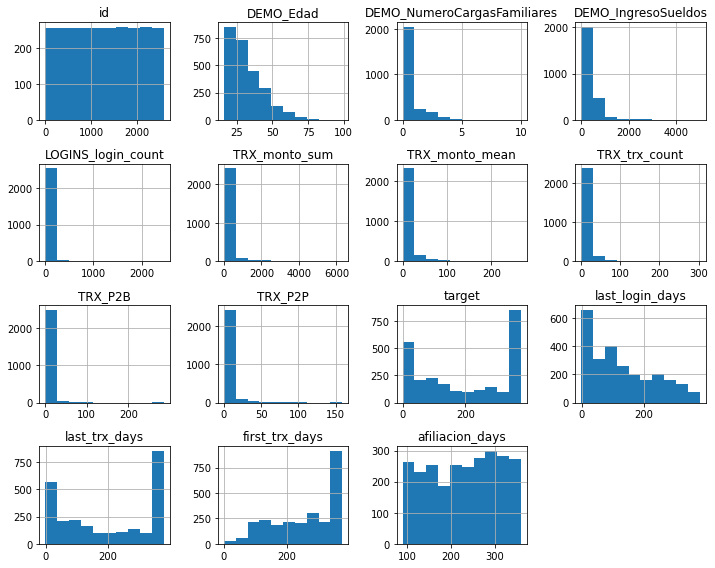

In [63]:
_plt_histogram(df, numerical_features)

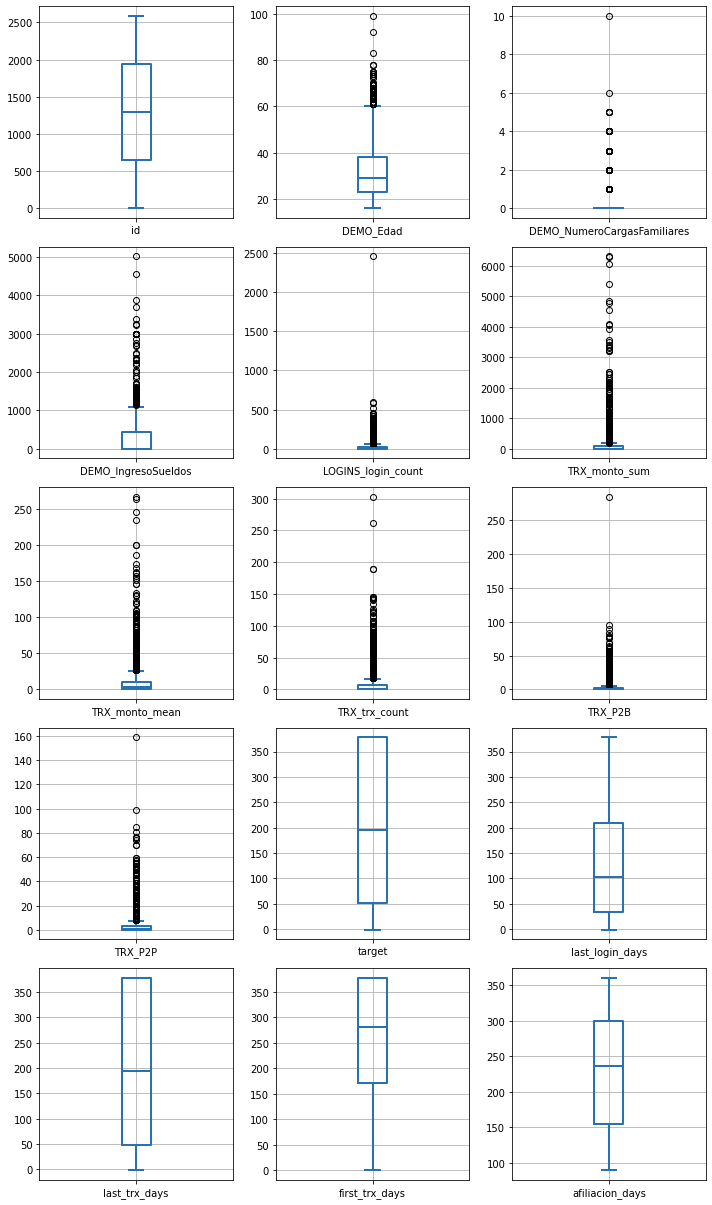

In [64]:
_plt_boxplot(df, numerical_features)

# Outliers

In [65]:
def _label_outliers(df: pd.DataFrame,
                    numerical_features: List[str]
                   ) -> pd.DataFrame:
    """
    Perform tukey method for outliers in every numerical_feature
    """
    for feature in numerical_features:
        df_outliers = _label_outliers_tukey(df, feature, f'outlier_{feature}')
    return df_outliers

def _label_outliers_tukey(df: pd.DataFrame,
                          column: str,
                          outlier_column: str
                         ) -> pd.DataFrame:
    """
    Perform tukey method to identify outliers
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df[outlier_column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), True, False)
    return df

In [66]:
df_out = _label_outliers(df, numerical_features)

In [67]:
df_out.head()

,id,DEMO_TipoVivienda,DEMO_SituacionLaboral,DEMO_EstadoCivil,DEMO_NivelEstudios,DEMO_Edad,DEMO_RangoEdad,DEMO_Genero,DEMO_NumeroCargasFamiliares,DEMO_IngresoSueldos,LOGINS_login_count,TRX_monto_sum,TRX_monto_mean,TRX_trx_count,TRX_P2B,TRX_P2P,target,last_login_days,last_trx_days,first_trx_days,afiliacion_days,outlier_id,outlier_DEMO_Edad,outlier_DEMO_NumeroCargasFamiliares,outlier_DEMO_IngresoSueldos,outlier_LOGINS_login_count,outlier_TRX_monto_sum,outlier_TRX_monto_mean,outlier_TRX_trx_count,outlier_TRX_P2B,outlier_TRX_P2P,outlier_target,outlier_last_login_days,outlier_last_trx_days,outlier_first_trx_days,outlier_afiliacion_days
0,1,VIVE CON FAMILIARES,INDEPENDIENTE,VIUDO,MEDIOS / SECUNDARIOS,73,9.- Más de 65,FEMENINO,0,0.0,1.0,3.00,3.000000,1.0,0.0,1.0,204,204,204,204,204,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,23,PROPIA NO HIPOTECADA,EMPLEADO,CASADO,PRIMARIOS/BASICOS,41,6.- 35-45,FEMENINO,3,560.0,7.0,3.00,3.000000,1.0,0.0,1.0,179,103,179,179,179,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,72,VIVE CON FAMILIARES,EMPLEADO,CASADO,UNIVERSITARIOS,38,6.- 35-45,FEMENINO,0,976.0,7.0,82.75,13.791667,6.0,4.0,2.0,11,11,11,197,197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,90,VIVE CON FAMILIARES,NO TRABAJA,UNION LIBRE < 2 ANIOS,MEDIOS / SECUNDARIOS,30,5.- 27-35,MASCULINO,0,0.0,3.0,0.00,0.000000,0.0,0.0,0.0,378,222,378,378,222,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,105,NO DEFINIDO,EMPLEADO,SOLTERO,NO DEFINIDO,24,3.- 21-25,MASCULINO,0,400.0,4.0,3.00,3.000000,1.0,0.0,1.0,274,272,274,274,274,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
_query = "outlier_DEMO_Edad == False and outlier_DEMO_IngresoSueldos == False and outlier_LOGINS_login_count == False and outlier_TRX_monto_sum == False and outlier_TRX_monto_mean == False and outlier_TRX_trx_count == False"

df_no_outliers = df_out.query(_query)

per_data_with_no_outlier = (df_no_outliers.shape[0])/(df.shape[0])
per_data_with_no_outlier

0.7143968871595331

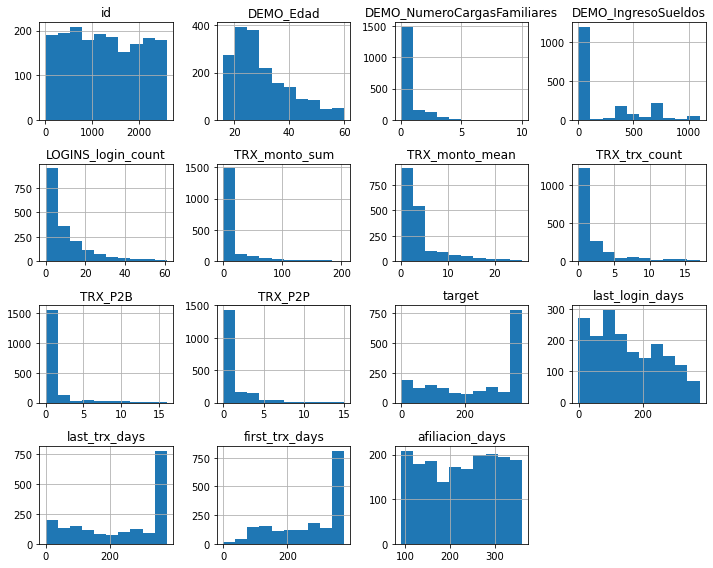

In [69]:
_plt_histogram(df_no_outliers, numerical_features)

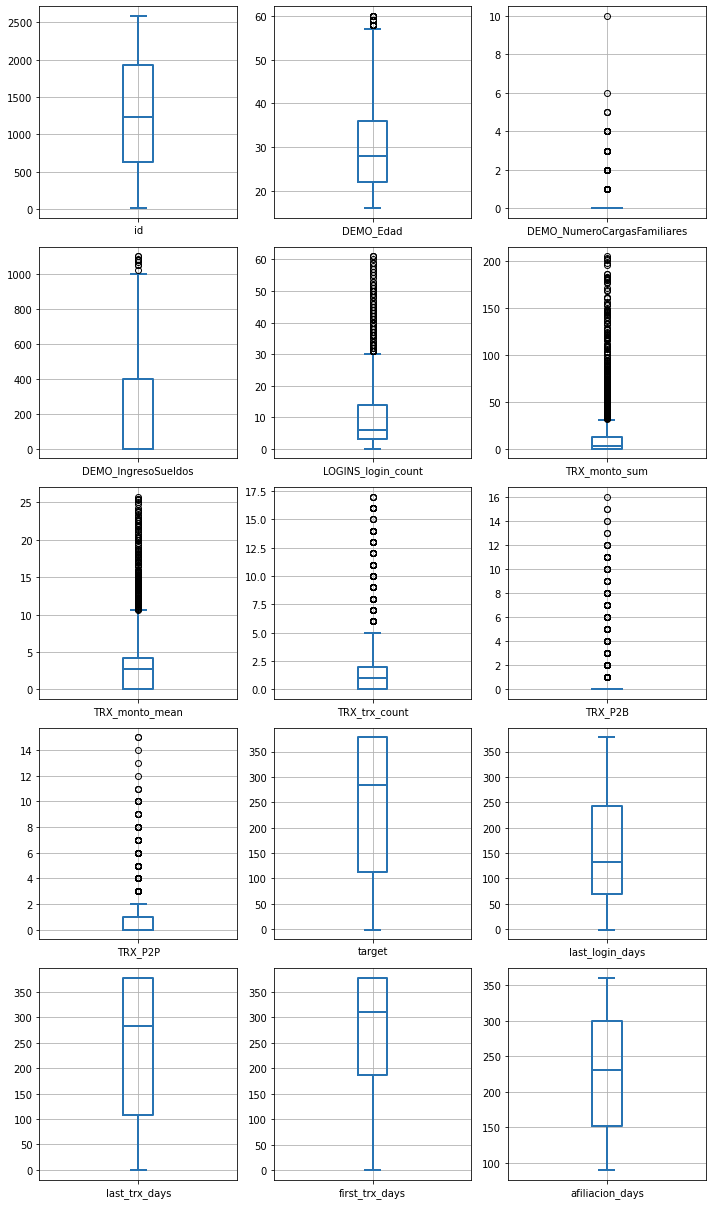

In [70]:
_plt_boxplot(df_no_outliers, numerical_features)

In [71]:
df = df_no_outliers[numerical_features + categorical_features]
df = df.drop(['id'], axis=1)

In [72]:
numerical_features = list([col for col in df.select_dtypes(['float64', 'int64']).columns])
categorical_features = list([col for col in df.select_dtypes('object').columns])

_numerical_eda(df, numerical_features)

,feature,n_row,n_col,num_null,prop_null,mean,std,min,per_1,per_25,median,per_75,per_99,max
0,DEMO_Edad,1836,14,0,0.0,30.434641,10.236665,16.0,18.0,22.0,28.0,36.0000,58.00000,60.00
1,DEMO_IngresoSueldos,1836,14,0,0.0,204.160120,305.330653,0.0,0.0,0.0,0.0,400.0000,1000.00000,1100.00
2,DEMO_NumeroCargasFamiliares,1836,14,0,0.0,0.337146,0.820591,0.0,0.0,0.0,0.0,0.0000,3.00000,10.00
3,LOGINS_login_count,1836,14,0,0.0,10.362200,11.302393,0.0,0.0,3.0,6.0,14.0000,52.00000,61.00
4,TRX_P2B,1836,14,0,0.0,0.805556,2.087360,0.0,0.0,0.0,0.0,0.0000,11.00000,16.00
5,TRX_P2P,1836,14,0,0.0,1.080610,1.801124,0.0,0.0,0.0,0.0,1.0000,9.00000,15.00
6,TRX_monto_mean,1836,14,0,0.0,3.539122,5.031651,0.0,0.0,0.0,2.7,4.2425,22.49125,25.75
7,TRX_monto_sum,1836,14,0,0.0,15.949074,33.633411,0.0,0.0,0.0,3.0,12.6225,170.69600,205.31
8,TRX_trx_count,1836,14,0,0.0,2.129630,3.354114,0.0,0.0,0.0,1.0,2.0000,15.00000,17.00
9,afiliacion_days,1836,14,0,0.0,226.086057,80.051238,90.0,92.0,152.0,231.0,300.0000,356.00000,360.00


In [73]:
_categorical_eda(df, categorical_features)

,feature,n_row,n_col,num_null,prop_null,num_categories,category,mode,mode_count
0,DEMO_EstadoCivil,1836,6,0,0.0,6,"[CASADO, UNION LIBRE < 2 ANIOS, SOLTERO, VIUDO...",SOLTERO,1412
1,DEMO_Genero,1836,6,0,0.0,2,"[FEMENINO, MASCULINO]",FEMENINO,919
2,DEMO_NivelEstudios,1836,6,0,0.0,7,"[PRIMARIOS/BASICOS , UNI...",MEDIOS / SECUNDARIOS,1241
3,DEMO_RangoEdad,1836,6,0,0.0,8,"[6.- 35-45, 5.- 27-35, 3.- 21-25, 7.- 45-55, 2...",5.- 27-35,485
4,DEMO_SituacionLaboral,1836,6,0,0.0,5,"[EMPLEADO , NO ...",EMPLEADO,617
5,DEMO_TipoVivienda,1836,6,0,0.0,7,"[PROPIA NO HIPOTECADA , VIV...",VIVE CON FAMILIARES,1246


# Correlation

In [74]:
corr_matrix = df[numerical_features].corr()
corr_matrix

,DEMO_Edad,DEMO_NumeroCargasFamiliares,DEMO_IngresoSueldos,LOGINS_login_count,TRX_monto_sum,TRX_monto_mean,TRX_trx_count,TRX_P2B,TRX_P2P,target,last_login_days,last_trx_days,first_trx_days,afiliacion_days
DEMO_Edad,1.000000,0.436175,0.188181,-0.152107,-0.088904,-0.035528,-0.170822,-0.105525,-0.165498,0.143845,0.084634,0.145093,0.096015,-0.031563
DEMO_NumeroCargasFamiliares,0.436175,1.000000,0.060139,-0.069309,-0.075242,-0.056480,-0.103346,-0.064118,-0.095040,0.089743,0.045492,0.087430,0.068121,0.007858
DEMO_IngresoSueldos,0.188181,0.060139,1.000000,-0.042208,0.044624,0.036153,0.009915,0.052630,-0.029060,0.009383,-0.001943,0.015228,0.019477,0.012135
LOGINS_login_count,-0.152107,-0.069309,-0.042208,1.000000,0.386265,0.250988,0.490947,0.293922,0.499911,-0.387308,-0.427991,-0.387270,-0.225661,0.052395
TRX_monto_sum,-0.088904,-0.075242,0.044624,0.386265,1.000000,0.720239,0.829126,0.685253,0.548740,-0.579121,-0.340398,-0.575560,-0.335857,-0.010839
TRX_monto_mean,-0.035528,-0.056480,0.036153,0.250988,0.720239,1.000000,0.498441,0.387895,0.357843,-0.617372,-0.288741,-0.617470,-0.507326,-0.009561
TRX_trx_count,-0.170822,-0.103346,0.009915,0.490947,0.829126,0.498441,1.000000,0.779606,0.721791,-0.694488,-0.364066,-0.690049,-0.413086,0.017755
TRX_P2B,-0.105525,-0.064118,0.052630,0.293922,0.685253,0.387895,0.779606,1.000000,0.242195,-0.502888,-0.342961,-0.496690,-0.273094,0.006199
TRX_P2P,-0.165498,-0.095040,-0.029060,0.499911,0.548740,0.357843,0.721791,0.242195,1.000000,-0.515231,-0.255424,-0.514686,-0.318630,0.067163
target,0.143845,0.089743,0.009383,-0.387308,-0.579121,-0.617372,-0.694488,-0.502888,-0.515231,1.000000,0.519722,0.990868,0.856649,0.195539


In [75]:
drop_correlation_columns = ['last_trx_days', 'first_trx_days', # suspicious correlation with target
                            'TRX_monto_sum', 'TRX_P2B', 'TRX_P2P', # multicolineality
                            'DEMO_NumeroCargasFamiliares', 'DEMO_IngresoSueldos' # low correlation with target
                           ]
df_drop_corr = df.drop(drop_correlation_columns, axis=1)

numerical_features = list([col for col in df_drop_corr.select_dtypes(['float64', 'int64']).columns])

<Axes: >

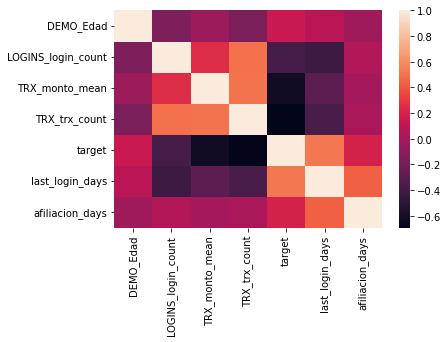

In [76]:
sns.heatmap(df_drop_corr[numerical_features].corr())

# Model

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (StandardScaler, OneHotEncoder)
from sklearn.compose import ColumnTransformer

## target

In [78]:
bins = [-np.inf, 60, np.inf]
labels = [0, 1]
df_drop_corr['target'] = pd.cut(df_drop_corr['target'], bins=bins, labels=labels, right=False)

In [79]:
df_drop_corr['target'].value_counts()/df_drop_corr.shape[0]

target
1    0.851852
0    0.148148
Name: count, dtype: float64

## train, test sets

In [144]:
X = df_drop_corr.drop(["target"], axis=1)
y = df_drop_corr['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)

## transformations

In [158]:
numerical_features = ['DEMO_Edad',
                      'LOGINS_login_count',
                      'TRX_monto_mean',
                      'TRX_trx_count',
                      'last_login_days',
#                       'afiliacion_days'
                     ]

categorical_features = ['DEMO_TipoVivienda',
                        #  'DEMO_SituacionLaboral',
                        #  'DEMO_EstadoCivil',
                        #  'DEMO_NivelEstudios',
#                         'DEMO_RangoEdad',
                        #  'DEMO_Genero'
                       ]

In [159]:
MIN_FREQUENCY = 0.02

numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())
          ]
)

categorical_transformer = Pipeline(
    steps=[("one_hot", 
            OneHotEncoder(handle_unknown="infrequent_if_exist", 
                          drop ="first", 
                          min_frequency=MIN_FREQUENCY
                         ))
          ]
)

preprocessor = ColumnTransformer(
    transformers=[("cat", categorical_transformer, categorical_features),
                  ("num", numeric_transformer, numerical_features)
                 ]
)

clf_t = Pipeline(
    steps=[("preprocessor", preprocessor)]
)

# transformer
clf_t.fit(X_train)

# train
mat_train = clf_t.transform(X_train)#.toarray()
X_train_t = pd.DataFrame(mat_train, columns = clf_t.get_feature_names_out(), index=X_train.index)

# test
mat_test = clf_t.transform(X_test)#.toarray()
X_test_t = pd.DataFrame(mat_test, columns = clf_t.get_feature_names_out(), index=X_test.index)

## fit model

In [160]:
import statsmodels.api as sm

In [161]:
log_reg = sm.Logit(y_train, X_train_t).fit() 

Optimization terminated successfully.
         Current function value: 0.236910
         Iterations 8


In [162]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1377
Model:                          Logit   Df Residuals:                     1368
Method:                           MLE   Df Model:                            8
Date:                Sun, 28 Jan 2024   Pseudo R-squ.:                  0.4352
Time:                        23:36:22   Log-Likelihood:                -326.23
converged:                       True   LL-Null:                       -577.63
Covariance Type:            nonrobust   LLR p-value:                1.759e-103
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
cat__DEMO_TipoVivienda_NO DEFINIDO                                  2.9263      0.332      8.809      0.

## Metrics

In [163]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [164]:
def _plot_roc_curve(fpr, tpr, auc, type_set):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {type_set} set')
    plt.legend(loc='lower right')
    plt.show()
    
def _classification_metrics(y_train, y_test, estimated_probability_train, estimated_probability_test):
    auc_train = roc_auc_score(y_train, estimated_probability_train)
    auc_test = roc_auc_score(y_test, estimated_probability_test)
    gini_train = (2*auc_train -1)
    gini_test = (2*auc_test -1)
    
    fpr_train, tpr_train, thresholds = roc_curve(y_train, estimated_probability_train)
    fpr_test, tpr_test, thresholds = roc_curve(y_test, estimated_probability_test)
    ks_train = np.max(np.abs(tpr_train - fpr_train))
    ks_test = np.max(np.abs(tpr_test - fpr_test))
    
    accuracy_train = accuracy_score(y_train, list(map(round, estimated_probability_train)))
    accuracy_test = accuracy_score(y_test, list(map(round, estimated_probability_test)))
    
    classification_report_train = classification_report(y_train, list(map(round, estimated_probability_train)))
    classification_report_test = classification_report(y_test, list(map(round, estimated_probability_test)))
    
    print("#"*35)
    print("auc_train:", auc_train)
    print("auc_test:", auc_test)
    print("#"*35)
    print("gini_train:", gini_train)
    print("gini_test:", gini_test)
    print("#"*35)
    print("ks_train:", ks_train)
    print("ks_test:", ks_test)
    print("#"*35)
    print("accuracy_train:", accuracy_train)
    print("accuracy_test:", accuracy_test)
    print("#"*35)
    print("classification_report_train:")
    print(classification_report_train)
    print("classification_report_test:")
    print(classification_report_test)
    
    return fpr_train, tpr_train, fpr_test, tpr_test    

In [165]:
estimated_probability_train = log_reg.predict(X_train_t)
estimated_probability_test = log_reg.predict(X_test_t)
fpr_train, tpr_train, fpr_test, tpr_test = _classification_metrics(y_train, y_test, estimated_probability_train, estimated_probability_test)

###################################
auc_train: 0.9251709208832722
auc_test: 0.9302692944185347
###################################
gini_train: 0.8503418417665445
gini_test: 0.8605385888370694
###################################
ks_train: 0.744458653026428
ks_test: 0.7627877237851662
###################################
accuracy_train: 0.9012345679012346
accuracy_test: 0.8932461873638344
###################################
classification_report_train:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65       204
           1       0.94      0.95      0.94      1173

    accuracy                           0.90      1377
   macro avg       0.81      0.79      0.80      1377
weighted avg       0.90      0.90      0.90      1377

classification_report_test:
              precision    recall  f1-score   support

           0       0.65      0.60      0.63        68
           1       0.93      0.94      0.94       391

    accuracy               

In [166]:
confusion_matrix(y_train, list(map(round, estimated_probability_train)))

array([[ 129,   75],
       [  61, 1112]], dtype=int64)

In [167]:
confusion_matrix(y_test, list(map(round, estimated_probability_test)))

array([[ 41,  27],
       [ 22, 369]], dtype=int64)

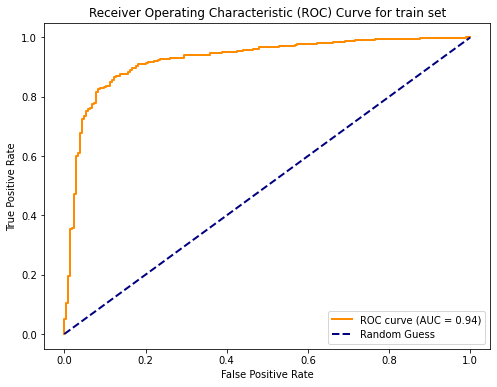

In [168]:
_plot_roc_curve(fpr_train, tpr_train, auc_train, "train")

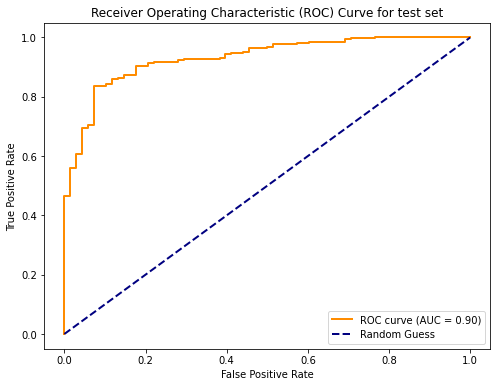

In [169]:
_plot_roc_curve(fpr_test, tpr_test, auc_test, "test")